In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/GoogleStock Price.csv')

In [ ]:
data = data[['Close']]

In [ ]:
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [ ]:
dataset = data.values

In [ ]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train_data, test_data = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

In [ ]:
def create_sequences(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i + look_back, 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X),np.array(Y)

In [ ]:
look_back = 10
X_train, Y_train = create_sequences(train_data, look_back)
X_test, Y_test = create_sequences(test_data, look_back)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(X_train, Y_train, epochs=50, batch_size=64, verbose=2)

Epoch 1/50
33/33 - 2s - loss: 0.0191 - 2s/epoch - 76ms/step
Epoch 2/50
33/33 - 0s - loss: 0.0011 - 265ms/epoch - 8ms/step
Epoch 3/50
33/33 - 0s - loss: 2.5427e-04 - 270ms/epoch - 8ms/step
Epoch 4/50
33/33 - 0s - loss: 2.1091e-04 - 222ms/epoch - 7ms/step
Epoch 5/50
33/33 - 0s - loss: 1.9213e-04 - 207ms/epoch - 6ms/step
Epoch 6/50
33/33 - 0s - loss: 1.7580e-04 - 214ms/epoch - 6ms/step
Epoch 7/50
33/33 - 0s - loss: 1.6835e-04 - 211ms/epoch - 6ms/step
Epoch 8/50
33/33 - 0s - loss: 1.5824e-04 - 275ms/epoch - 8ms/step
Epoch 9/50
33/33 - 0s - loss: 1.5645e-04 - 305ms/epoch - 9ms/step
Epoch 10/50
33/33 - 0s - loss: 1.5519e-04 - 262ms/epoch - 8ms/step
Epoch 11/50
33/33 - 0s - loss: 1.4990e-04 - 261ms/epoch - 8ms/step
Epoch 12/50
33/33 - 0s - loss: 1.5360e-04 - 223ms/epoch - 7ms/step
Epoch 13/50
33/33 - 0s - loss: 1.5086e-04 - 210ms/epoch - 6ms/step
Epoch 14/50
33/33 - 0s - loss: 1.4825e-04 - 230ms/epoch - 7ms/step
Epoch 15/50
33/33 - 0s - loss: 1.4983e-04 - 210ms/epoch - 6ms/step
Epoch 16/50
33

In [ ]:
Y_pred = model.predict(X_test)

17/17 [==============================] - 0s 3ms/step


Mean Squared Error: 13.976512201740842


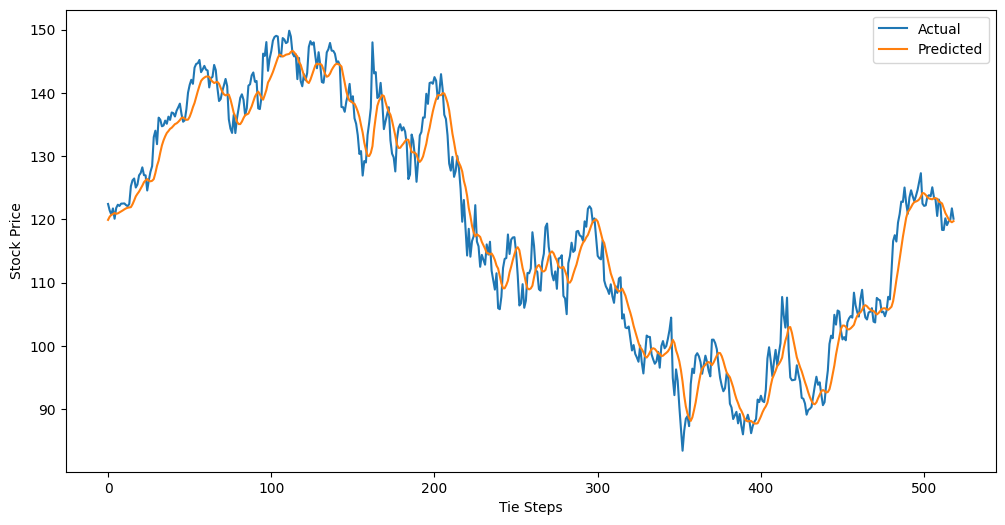

In [ ]:
Y_pred = scaler.inverse_transform(Y_pred)
Y_test = scaler.inverse_transform([Y_test])

mse = mean_squared_error(Y_test[0], Y_pred[:, 0])
print(f"Mean Squared Error: {mse}")

plt.figure(figsize=(12, 6))
plt.plot(Y_test[0], label='Actual')
plt.plot(Y_pred[:, 0], label='Predicted')
plt.xlabel('Tie Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()